# Galaxy Extraction

## Imports

In [2]:
#Importin'
%matplotlib inline
import glob
from astropy.io import fits
import numpy as np
import pylab as pl
from astropy import visualization
import os
from matplotlib import colors
from itertools import chain
from astropy import constants as c

## Data Analysis

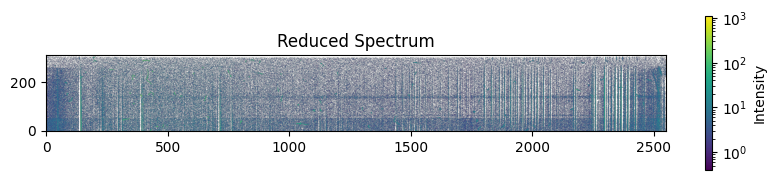

In [4]:
data = fits.getdata('../crop_science.fits')
fig = pl.figure(figsize=(10,10))
pl.imshow(data, origin = 'lower', cmap = 'viridis', norm = colors.LogNorm())
pl.title('Reduced Spectrum')
pl.colorbar(label='Intensity', shrink=0.2)

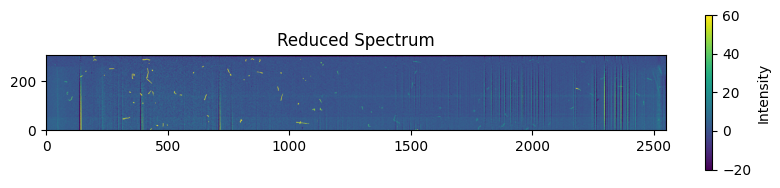

In [5]:
fig = pl.figure(figsize=(10,10))
pl.imshow(data, origin = 'lower', cmap = 'viridis', vmin = -20, vmax = 60)
pl.title('Reduced Spectrum Linear Scaling')
pl.colorbar(label='Intensity', shrink=0.2)

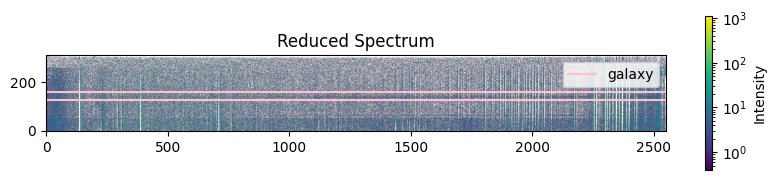

In [53]:
fig = pl.figure(figsize=(10,10))
pl.imshow(data, origin = 'lower', cmap = 'viridis', norm = colors.LogNorm())
#Outlining the galaxy
pl.axhline(126, color = 'pink')
pl.axhline(158, color = 'pink')
pl.title('Reduced Spectrum')
pl.legend(['galaxy'])
pl.colorbar(label='Intensity', shrink=0.2)

Text(0.5, 1.0, 'Extracted Galaxy')

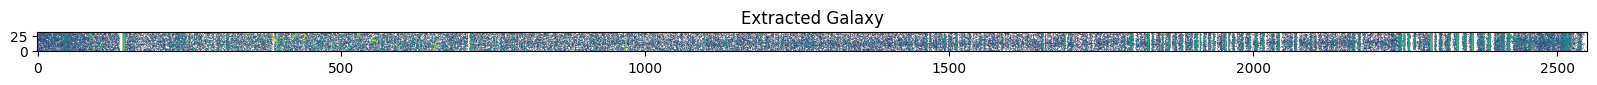

In [30]:
galaxy = data[126:158]
fig = pl.figure(figsize=(20,20))
pl.imshow(galaxy, origin = 'lower', cmap = 'viridis', norm = colors.LogNorm())
pl.title('Extracted Galaxy')

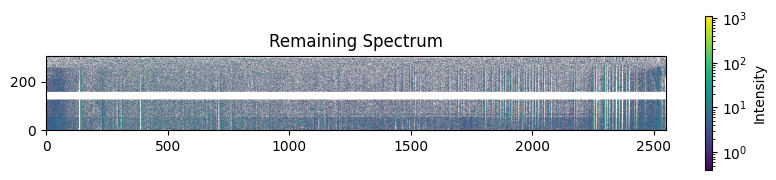

In [56]:
remaining  = np.concatenate((data[:125], data[126:158]- galaxy, data[159:]))
fig = pl.figure(figsize=(10,10))
pl.imshow(remaining, origin = 'lower', cmap = 'viridis', norm = colors.LogNorm())
pl.title('Remaining Spectrum')
pl.colorbar(label='Intensity', shrink=0.2)

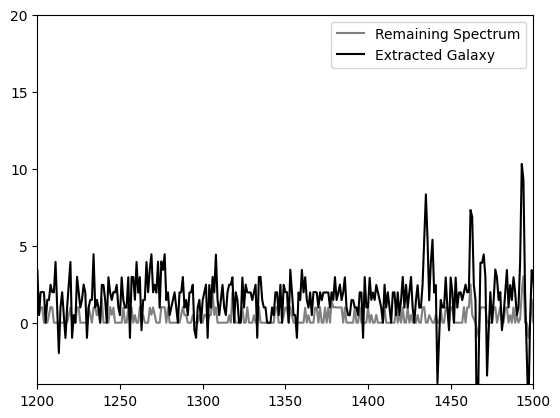

In [40]:
galaxy_spectrum = np.median(galaxy, axis = 0)
remaining_spectrum = np.median(remaining, axis = 0)
pl.plot(remaining_spectrum, color = 'gray', label = 'Remaining Spectrum')
pl.plot(galaxy_spectrum, color = 'black', label = 'Extracted Galaxy')
pl.ylim(-4, 20)
pl.xlim(1200, 1500) #zooming in to show difference in spectra
pl.legend()